In [1]:
pwd

'c:\\edu\\03_AI\\deeplearning\\practice'

In [5]:
ls ..

 C 드라이브의 볼륨: Windows-SSD
 볼륨 일련 번호: 5CAF-2C76

 c:\edu\03_AI\deeplearning 디렉터리

2021-02-09  오후 03:32    <DIR>          .
2021-02-09  오후 03:32    <DIR>          ..
2021-02-09  오전 10:27    <DIR>          .idea
2021-02-09  오후 03:32    <DIR>          .ipynb_checkpoints
2021-02-09  오전 10:27    <DIR>          colab
2021-02-09  오전 10:27    <DIR>          dataset
2021-02-09  오후 03:31    <DIR>          deeplearning_class
2021-02-09  오후 03:33    <DIR>          practice
2021-02-09  오후 03:31    <DIR>          run_project
               0개 파일                   0 바이트
               9개 디렉터리  368,095,535,104 바이트 남음


# 데이터 불러오기

In [10]:
import pandas as pd

df = pd.read_csv('../dataset/housing.csv', delim_whitespace=True, header=None)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# 기본 설정

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import tensorflow as tf

# seed값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# 표준화

In [219]:
from sklearn.preprocessing import StandardScaler

dataset = df.values

scaler = StandardScaler()
scaler.fit(dataset)
scaled1 = scaler.transform(dataset)

# 정규화

In [218]:
from sklearn.preprocessing import MinMaxScaler

dataset = df.values

scaler = MinMaxScaler()
scaler.fit(dataset)
scaled2 = scaler.transform(dataset)

# 데이터 분할

In [252]:
# 원본 데이터
dataset = df.values
X = dataset[:, :-1]
Y = dataset[:, -1]

# 표준화 데이터

In [234]:
X = scaled1[:, :-1]
Y = scaled1[:, -1]

# 정규화 데이터

In [240]:
X = scaled2[:, :-1]
Y = scaled2[:, -1]

# 데이터 확인

In [253]:
print(dataset.shape)
print(X.shape)
print(Y.shape)

(506, 14)
(506, 13)
(506,)


In [254]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=seed)

In [255]:
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))
print(len(X_train)/(len(X_train)+len(X_test)))  # 비율

354
152
354
152
0.6996047430830039


# early stopping

In [212]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_call_back = EarlyStopping(monitor='val_loss', patience=5)

# 모델링

In [256]:
model = Sequential()
model.add(Dense(30, input_dim = 13, activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['acc']) 

In [238]:
model1 = Sequential()
model1.add(Dense(30, input_dim = 13, activation = 'relu'))
model1.add(Dense(6, activation = 'relu'))
model1.add(Dense(1))
model1.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['acc']) 

In [244]:
model2 = Sequential()
model2.add(Dense(30, input_dim = 13, activation = 'relu'))
model2.add(Dense(6, activation = 'relu'))
model2.add(Dense(1))
model2.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['acc']) 

# 모델 학습

In [257]:
# verbose=0 학습 진행 경과 출력하지 않음
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 100, batch_size = 10) # callbacks=[early_stopping_call_back]

Epoch 1/100
29/29 [==============================] - 1s 5ms/step - loss: 3831.2063 - acc: 0.0000e+00 - val_loss: 233.1760 - val_acc: 0.0000e+00
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 229.1543 - acc: 0.0000e+00 - val_loss: 110.8401 - val_acc: 0.0000e+00
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 96.1813 - acc: 0.0000e+00 - val_loss: 79.9852 - val_acc: 0.0000e+00
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 68.9549 - acc: 0.0000e+00 - val_loss: 73.7165 - val_acc: 0.0000e+00
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 61.0265 - acc: 0.0000e+00 - val_loss: 68.9566 - val_acc: 0.0000e+00
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 61.8508 - acc: 0.0000e+00 - val_loss: 66.5032 - val_acc: 0.0000e+00
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 51.6615 - acc: 0.0000e+00 - val_loss: 68.3906 - val_acc: 0.0000e+00
Epoch 8/

Epoch 59/100
29/29 [==============================] - 0s 2ms/step - loss: 37.1833 - acc: 0.0000e+00 - val_loss: 41.1583 - val_acc: 0.0000e+00
Epoch 60/100
29/29 [==============================] - 0s 2ms/step - loss: 43.7017 - acc: 0.0000e+00 - val_loss: 40.6997 - val_acc: 0.0000e+00
Epoch 61/100
29/29 [==============================] - 0s 2ms/step - loss: 39.1736 - acc: 0.0000e+00 - val_loss: 38.9570 - val_acc: 0.0000e+00
Epoch 62/100
29/29 [==============================] - 0s 2ms/step - loss: 35.5015 - acc: 0.0000e+00 - val_loss: 40.2293 - val_acc: 0.0000e+00
Epoch 63/100
29/29 [==============================] - 0s 2ms/step - loss: 31.9091 - acc: 0.0000e+00 - val_loss: 39.3823 - val_acc: 0.0000e+00
Epoch 64/100
29/29 [==============================] - 0s 2ms/step - loss: 34.9185 - acc: 0.0000e+00 - val_loss: 44.2427 - val_acc: 0.0000e+00
Epoch 65/100
29/29 [==============================] - 0s 2ms/step - loss: 32.3301 - acc: 0.0000e+00 - val_loss: 37.2796 - val_acc: 0.0000e+00
Epoch 

In [239]:
# verbose=0 학습 진행 경과 출력하지 않음
history1 = model1.fit(X_train, Y_train, validation_split = 0.2, epochs = 100, batch_size = 10) # callbacks=[early_stopping_call_back]

Epoch 1/100
29/29 [==============================] - 0s 5ms/step - loss: 1.0028 - acc: 0.0000e+00 - val_loss: 0.8191 - val_acc: 0.0000e+00
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.9007 - acc: 0.0000e+00 - val_loss: 0.6996 - val_acc: 0.0000e+00
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.7753 - acc: 0.0000e+00 - val_loss: 0.5895 - val_acc: 0.0000e+00
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5805 - acc: 0.0000e+00 - val_loss: 0.4987 - val_acc: 0.0000e+00
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5249 - acc: 0.0000e+00 - val_loss: 0.4240 - val_acc: 0.0000e+00
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.4828 - acc: 0.0000e+00 - val_loss: 0.3621 - val_acc: 0.0000e+00
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.2415 - acc: 0.0000e+00 - val_loss: 0.3278 - val_acc: 0.0000e+00
Epoch 8/100
29/29 [========

29/29 [==============================] - 0s 2ms/step - loss: 0.0913 - acc: 0.0000e+00 - val_loss: 0.1044 - val_acc: 0.0000e+00
Epoch 60/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1829 - acc: 0.0000e+00 - val_loss: 0.1153 - val_acc: 0.0000e+00
Epoch 61/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1161 - acc: 0.0000e+00 - val_loss: 0.1140 - val_acc: 0.0000e+00
Epoch 62/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1128 - acc: 0.0000e+00 - val_loss: 0.1089 - val_acc: 0.0000e+00
Epoch 63/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1329 - acc: 0.0000e+00 - val_loss: 0.1046 - val_acc: 0.0000e+00
Epoch 64/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0757 - acc: 0.0000e+00 - val_loss: 0.1056 - val_acc: 0.0000e+00
Epoch 65/100
29/29 [==============================] - 0s 2ms/step - loss: 0.1119 - acc: 0.0000e+00 - val_loss: 0.1032 - val_acc: 0.0000e+00
Epoch 66/100
29/29 [=============

In [245]:
# verbose=0 학습 진행 경과 출력하지 않음
history2 = model2.fit(X_train, Y_train, validation_split = 0.2, epochs = 100, batch_size = 10) # callbacks=[early_stopping_call_back]

Epoch 1/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0983 - acc: 0.0275 - val_loss: 0.0712 - val_acc: 0.0141
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0525 - acc: 0.0282 - val_loss: 0.0510 - val_acc: 0.0141
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0360 - acc: 0.0133 - val_loss: 0.0387 - val_acc: 0.0141
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0272 - acc: 0.0215 - val_loss: 0.0314 - val_acc: 0.0282
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0225 - acc: 0.0317 - val_loss: 0.0255 - val_acc: 0.0282
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0215 - acc: 0.0245 - val_loss: 0.0219 - val_acc: 0.0423
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0156 - acc: 0.0145 - val_loss: 0.0203 - val_acc: 0.0423
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0182 - a

29/29 [==============================] - 0s 2ms/step - loss: 0.0066 - acc: 0.0365 - val_loss: 0.0050 - val_acc: 0.0563
Epoch 64/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0051 - acc: 0.0340 - val_loss: 0.0051 - val_acc: 0.0563
Epoch 65/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0060 - acc: 0.0309 - val_loss: 0.0050 - val_acc: 0.0563
Epoch 66/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0047 - acc: 0.0334 - val_loss: 0.0048 - val_acc: 0.0563
Epoch 67/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0056 - acc: 0.0289 - val_loss: 0.0056 - val_acc: 0.0563
Epoch 68/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0055 - acc: 0.0312 - val_loss: 0.0045 - val_acc: 0.0563
Epoch 69/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0045 - acc: 0.0302 - val_loss: 0.0048 - val_acc: 0.0563
Epoch 70/100
29/29 [==============================] - 0s 2ms/step - loss: 0.0054 - acc: 0

In [247]:
print(type(history))
print(type(history1))
print(type(history2))

<class 'tensorflow.python.keras.callbacks.History'>
<class 'tensorflow.python.keras.callbacks.History'>
<class 'tensorflow.python.keras.callbacks.History'>


In [258]:
vloss = history.history['val_loss']
loss = history.history['loss']
vacc = history.history['val_acc']
acc = history.history['acc']

In [248]:
std_vloss = history1.history['val_loss']
std_loss = history1.history['loss']
std_vacc = history1.history['val_acc']
std_acc = history1.history['acc']

In [249]:
norm_vloss = history2.history['val_loss']
norm_loss = history2.history['loss']
norm_vacc = history2.history['val_acc']
norm_acc = history2.history['acc']

In [259]:
print(len(vloss))
print(len(loss))
print(len(acc))
print(len(vacc))

100
100
100
100


In [152]:
%matplotlib qt

In [153]:
%matplotlib inline

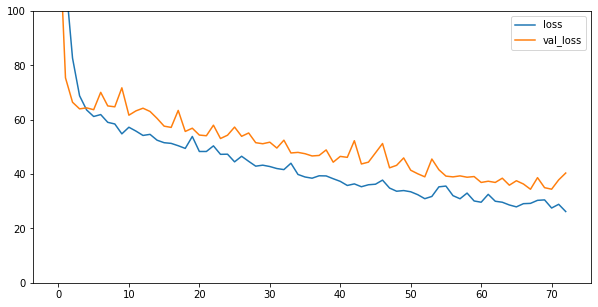

In [156]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.ylim(0, 100)
plt.plot(range(len(loss)), loss, label='loss')
plt.plot(range(len(loss)), vloss, label='val_loss')
plt.legend()
plt.show()

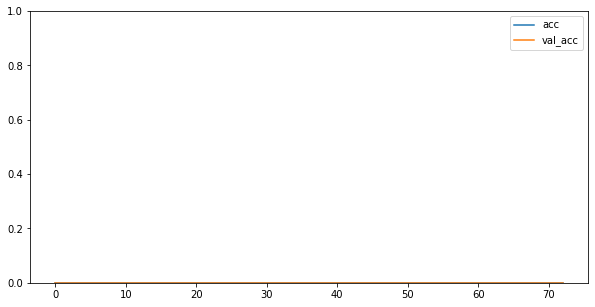

In [157]:
plt.figure(figsize=(10, 5))
plt.ylim(0, 1)
plt.plot(range(len(loss)), acc, label='acc')
plt.plot(range(len(loss)), vacc, label='val_acc')
plt.legend()
plt.show()

# 일반, 표준화, 정규화 loss 그래프

In [260]:
print(len(loss))
print(len(std_loss))
print(len(norm_loss))

100
100
100


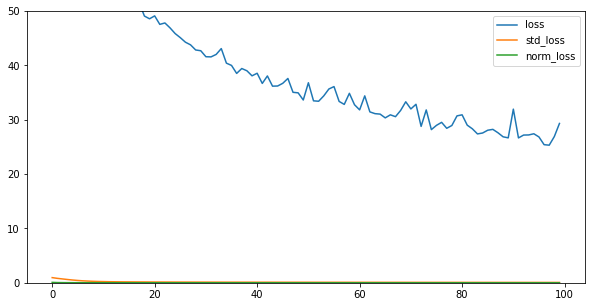

In [263]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.ylim(0, 50)
plt.plot(range(len(loss)), loss, label='loss')
plt.plot(range(len(loss)), std_loss, label='std_loss')
plt.plot(range(len(loss)), norm_loss, label='norm_loss')
plt.legend()

plt.savefig('c:/edu/py_data/loss_graph.jpg')
plt.show()

# 테스트

In [41]:
Y_prediction = model.predict(X_test).flatten()

In [70]:
model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 750us/step - loss: 32.0852 - acc: 0.0000e+00


[32.0852165222168, 0.0]

In [69]:
model.evaluate(X_test, Y_test)[1]

5/5 [==============================] - 0s 749us/step - loss: 32.0852 - acc: 0.0000e+00


0.0

In [58]:
for i in range(len(Y_test)):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print(f'{i+1:3d}번째 데이터 >>> 실제가격: {label:5.2f}, 예상가격: {prediction:5.2f}, 오차: {label-prediction:5.2f}')

  1번째 데이터 >>> 실제가격: 22.60, 예상가격: 21.08, 오차:  1.52
  2번째 데이터 >>> 실제가격: 50.00, 예상가격: 23.43, 오차: 26.57
  3번째 데이터 >>> 실제가격: 23.00, 예상가격: 23.70, 오차: -0.70
  4번째 데이터 >>> 실제가격:  8.30, 예상가격:  5.55, 오차:  2.75
  5번째 데이터 >>> 실제가격: 21.20, 예상가격: 19.13, 오차:  2.07
  6번째 데이터 >>> 실제가격: 19.90, 예상가격: 20.22, 오차: -0.32
  7번째 데이터 >>> 실제가격: 20.60, 예상가격: 15.66, 오차:  4.94
  8번째 데이터 >>> 실제가격: 18.70, 예상가격: 21.85, 오차: -3.15
  9번째 데이터 >>> 실제가격: 16.10, 예상가격: 16.38, 오차: -0.28
 10번째 데이터 >>> 실제가격: 18.60, 예상가격: 14.45, 오차:  4.15
 11번째 데이터 >>> 실제가격:  8.80, 예상가격: 11.01, 오차: -2.21
 12번째 데이터 >>> 실제가격: 17.20, 예상가격: 10.63, 오차:  6.57
 13번째 데이터 >>> 실제가격: 14.90, 예상가격: 11.62, 오차:  3.28
 14번째 데이터 >>> 실제가격: 10.50, 예상가격:  2.96, 오차:  7.54
 15번째 데이터 >>> 실제가격: 50.00, 예상가격: 44.58, 오차:  5.42
 16번째 데이터 >>> 실제가격: 29.00, 예상가격: 27.42, 오차:  1.58
 17번째 데이터 >>> 실제가격: 23.00, 예상가격: 16.58, 오차:  6.42
 18번째 데이터 >>> 실제가격: 33.30, 예상가격: 29.41, 오차:  3.89
 19번째 데이터 >>> 실제가격: 29.40, 예상가격: 27.73, 오차:  1.67
 20번째 데이터 >>> 실제가격: 21.00, 예상가격: 22.39, 오차: -1.39
